In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from svm import *

In [3]:
# read in data
X_train, y_train = read_bank_note(test=False)
X_test, y_test = read_bank_note(test=True)

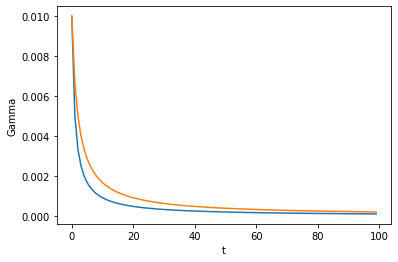

In [4]:
plt.plot([get_gamma(t) for t in range(100)])
plt.plot([get_gamma(t, d=0.02) for t in range(100)])
plt.xlabel('t')
plt.ylabel('Gamma')
plt.show()

# Problem 2

In [5]:
C = np.array([(100/873), (500/873), (700/873)])

## Problem 2.2a

In [6]:
params_2a=[]
error_train_2a=[]
error_test_2a=[]

for Ci in C:
    # instantiate model
    model = SVM(C=Ci, gamma0=1e-2, d=0.1)
    # fit to training data
    model.fit(X_train, y_train)
    
    # store weights
    params_2a.append(model.w.copy())
    
    # predict on training data
    y_pred = model.predict(X_train)
    # get training error
    error_train = get_error(y_pred, y_train)
    error_train_2a.append(error_train)
    
    # predict on test data
    y_pred = model.predict(X_test)
    # get test error
    error_test = get_error(y_pred, y_test)
    error_test_2a.append(error_test)
    
    # print results
    print(f"C = {round(Ci, 3)}, training error: {round(error_train, 4)}, test error: {round(error_test, 4)}")
    
params_2a = np.array(params_2a)
error_train_2a = np.array(error_train_2a)
error_test_2a = np.array(error_test_2a)

C = 0.115, training error: 0.0356, test error: 0.026
C = 0.573, training error: 0.0321, test error: 0.042
C = 0.802, training error: 0.1583, test error: 0.164


## Problem 2.2b

In [7]:
params_2b=[]
error_train_2b=[]
error_test_2b=[]

for Ci in C:
    # instantiate model
    model = SVM(C=Ci, gamma0=1e-2, d=0.1)
    # fit to training data
    model.fit(X_train, y_train)
    
    # store weights
    params_2b.append(model.w.copy())
    
    # predict on training data
    y_pred = model.predict(X_train)
    # get training error
    error_train = get_error(y_pred, y_train)
    error_train_2b.append(error_train)
    
    # predict on test data
    y_pred = model.predict(X_test)
    # get test error
    error_test = get_error(y_pred, y_test)
    error_test_2b.append(error_test)
    
    # print results
    print(f"C = {round(Ci, 3)}, training error: {round(error_train, 4)}, test error: {round(error_test, 4)}")
    
params_2b = np.array(params_2b)
error_train_2b = np.array(error_train_2b)
error_test_2b = np.array(error_test_2b)

C = 0.115, training error: 0.0424, test error: 0.052
C = 0.573, training error: 0.0115, test error: 0.01
C = 0.802, training error: 0.0356, test error: 0.042


## Problem 2c

In [8]:
import seaborn as sns

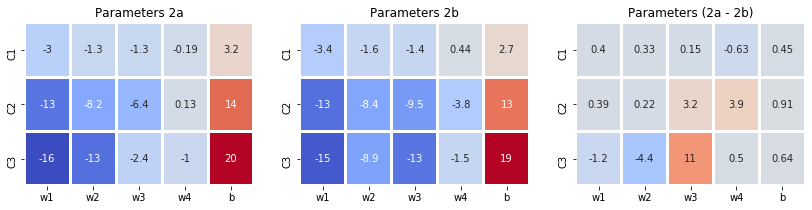

In [9]:
cmap='coolwarm'
vmin = min(params_2a.min(), params_2b.min())
vmax = min(params_2a.max(), params_2b.max())
x_lab = ['w1', 'w2', 'w3', 'w4', 'b']
y_lab = ['C1', 'C2', 'C3']
params_ab = params_2a - params_2b

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(14, 3))
sns.heatmap(params_2a, ax=ax[0], vmin=vmin, vmax=vmax, cmap=cmap, annot=True, linecolor='white', linewidth=2, cbar=False, xticklabels=x_lab, yticklabels=y_lab)
sns.heatmap(params_2b, ax=ax[1], vmin=vmin, vmax=vmax, cmap=cmap, annot=True, linecolor='white', linewidth=2, cbar=False, xticklabels=x_lab, yticklabels=y_lab)
sns.heatmap(params_ab, ax=ax[2], vmin=vmin, vmax=vmax, cmap=cmap, annot=True, linecolor='white', linewidth=2, cbar=False, xticklabels=x_lab, yticklabels=y_lab)

ax[0].set_title('Parameters 2a')
ax[1].set_title('Parameters 2b')
ax[2].set_title('Parameters (2a - 2b)')

plt.show()

In [ ]:
# lim = max(abs(vmin), abs(vmax)) * 1.2
# plt.figure(figsize=(4.5, 4.5))
# plt.scatter(params_2a.reshape(-1), params_2b.reshape(-1), label='Observations')
# plt.plot([-lim, lim], [-lim, lim], '--r', label='Reference Line')
# plt.grid(alpha=0.3)
# plt.xlim(-lim, lim)
# plt.ylim(-lim, lim)
# plt.xlabel('Params 2a')
# plt.ylabel('Params 2b')
# plt.legend()
# plt.show()

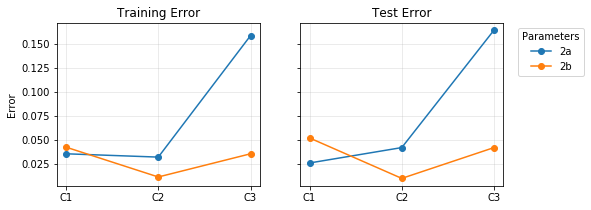

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(8, 3))
x_val = ['C1', 'C2', 'C3']

ax[0].plot(x_val, error_train_2a, '-o', label='2a')
ax[0].plot(x_val, error_train_2b, '-o', label='2b')

ax[1].plot(x_val, error_test_2a, '-o', label='2a')
ax[1].plot(x_val, error_test_2b, '-o', label='2b')

ax[0].set_ylabel('Error')

for i, title in enumerate(['Training', 'Test']):
    ax[i].grid(alpha=0.3)
    ax[i].set_title(f"{title} Error")
    
plt.legend(title='Parameters', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Problem 3

In [12]:
from scipy.optimize import minimize